# Imports

In [1]:
import importlib
import SYT
import matplotlib.pyplot as plt

importlib.reload(SYT)

<module 'SYT' from '/Users/sehaj/Developer-UW/uw-math-480/Math-480/6_20_2024_SYT/SYT.py'>

## SYT Helper Functions.
Implement the functions `is_valid_SYT` and `reshape_perm` then run this cell to test your helper functions. 

In [2]:
print(SYT.is_valid_SYT(((1, 2, 3), (4, 5, 6), (7, 8, 9)))) # True
print(SYT.is_valid_SYT(((1, 2, 3), (5, 4), (6,)))) # False

print(SYT.reshape_perm((1, 2, 3, 4, 5, 6), (3, 2, 1))) # ((1, 2, 3), (4, 5), (6,))
print(SYT.reshape_perm((1, 2, 3, 4, 5, 6), (3, 3))) # ((1, 2, 3), (4, 5, 6))

True
False
((1, 2, 3), (4, 5), (6,))
((1, 2, 3), (4, 5, 6))


# Generate all SYTs
Implement `SYTs` and generate all valid SYTs for the following shapes:
- (4,3,2,1)
- (2,2)
- (3,3)
- (4,4)
- (5,5)

Save your SYTs in the `data` subfolder. For example, the SYTs of shape (4,3,2,1) are saved in `data/SYTs_4_3_2_1.txt`.

What do you notice about SYTs of shape (n,n)? Write your observation in this cell here:


In [3]:
# Generate SYTs
shapes = [(4,3,2,1), (2,2), (3,3), (4,4), (5,5)]

for shape in shapes:
  file_name = ""
  for char in shape:
    file_name = file_name + "_" + str(char)
  with open("./data/SYTs" + file_name + ".txt", 'w') as file:
    file.write(str(SYT.SYTs(shape)) + '\n')


# Generating Random SYTs
Implement `random_SYT` and `random_SYT_2` and compare the efficacy on the shape (2,2,2).

Print out how long it takes to generate 10000 samples using each function and compare the distributions to the uniform distribution.

Plot the distributions using matplotlib and save them in the `figures` subfolder.

time for random_SYT: 3.1431596279144287
time for random_SYT_2: 0.009485483169555664


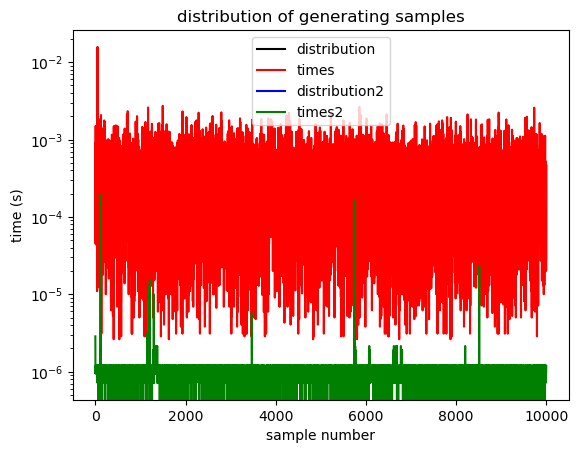

In [16]:
import time
shape = (2,2,2)

distribution = {syt: 0 for syt in SYT.SYTs(shape)}
times = []
for i in range(10000):
  # Test random_SYT()
  start = time.time()
  SYT.random_SYT(shape)
  end = time.time()
  times.append(end - start)
print('time for random_SYT:', sum(times))

distribution2 = {syt: 0 for syt in SYT.SYTs(shape)}
times2 = []
for i in range(10000):
  # Test random_SYT_2()
  start = time.time()
  SYT.random_SYT_2(shape)
  end = time.time()
  times2.append(end - start)
print('time for random_SYT_2:', sum(times2))

plt.figure()
plt.plot([0] * 10000, 'k', label='distribution')
plt.plot(times, 'r', label='times')
plt.plot([0] * 10000, 'b', label='distribution2')
plt.plot(times2, 'g', label='times2')
plt.xlabel('sample number')
plt.ylabel('time (s)')
plt.yscale('log')
plt.title('distribution of generating samples')
plt.legend()
plt.savefig("./figures/catalan_parenthesizations.png")
plt.show()
